In [31]:
library(igraph)
# library(Matrix)
# library(pracma)

[1] "Number of personal networks: "
[1] 132
[1] "======================================================================================="
[1] "Personal Network : # 101373961279443806744"
[1] "======================================================================================="
[1] "Number of circles:  3"


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“885 y values <= 0 omitted from logarithmic plot”

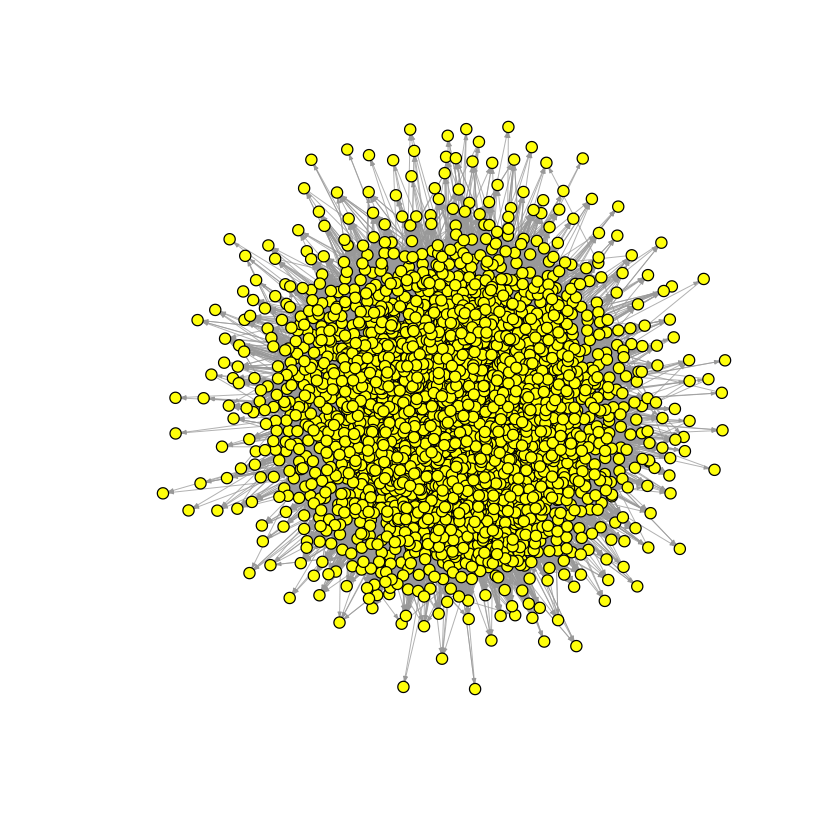

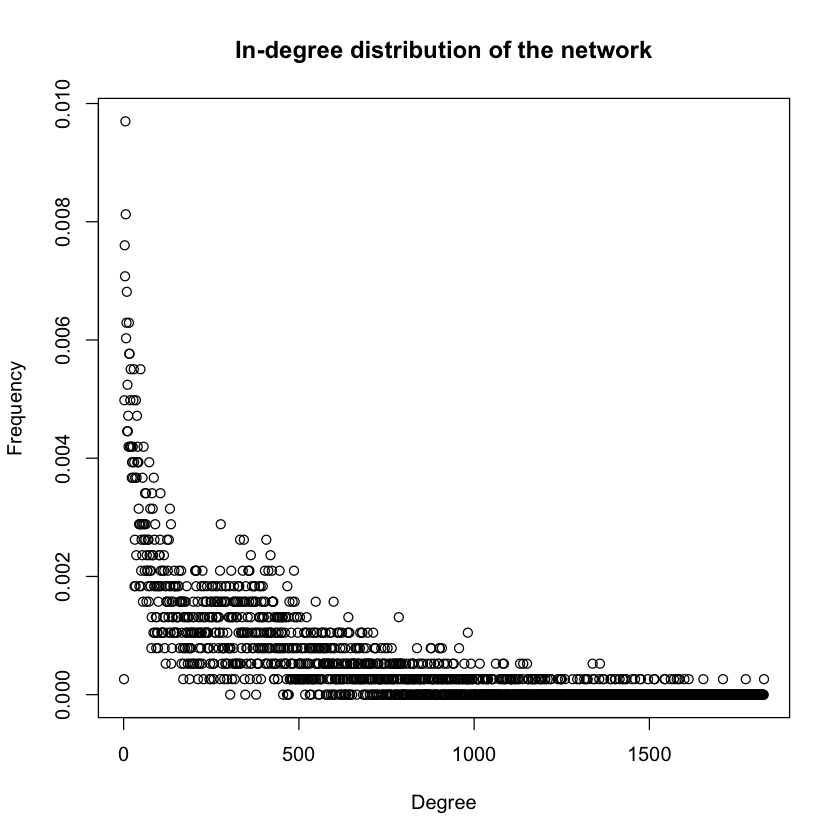

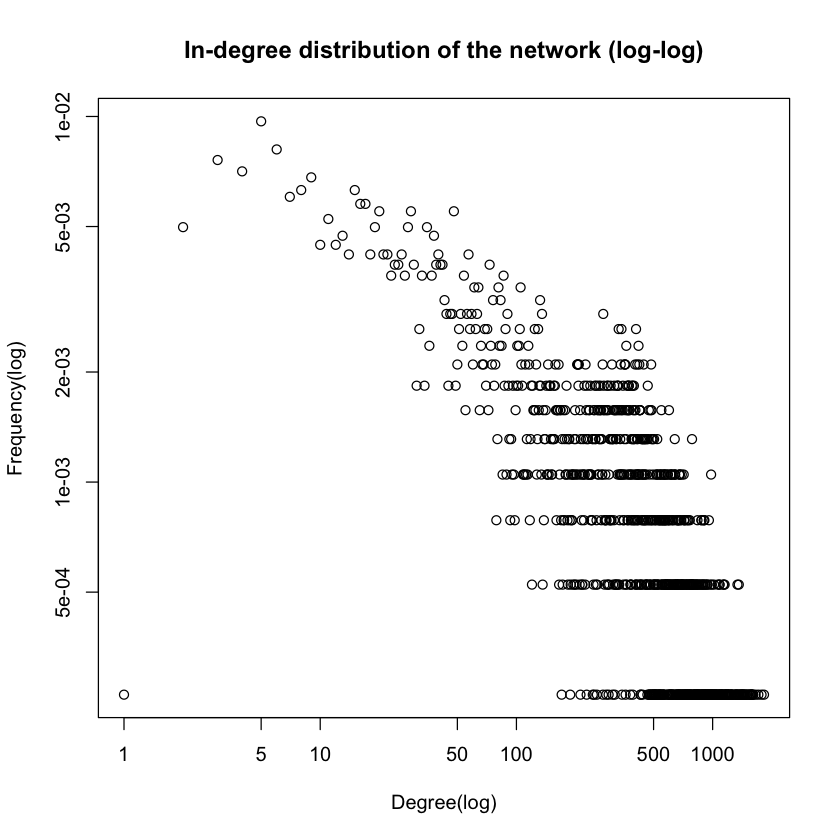

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“2756 y values <= 0 omitted from logarithmic plot”

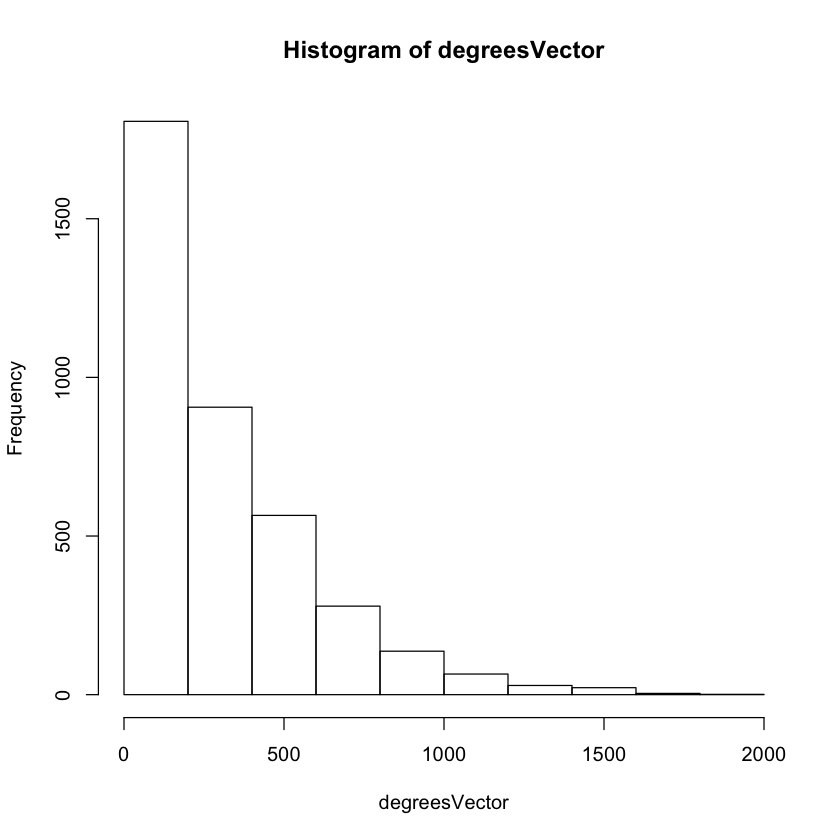

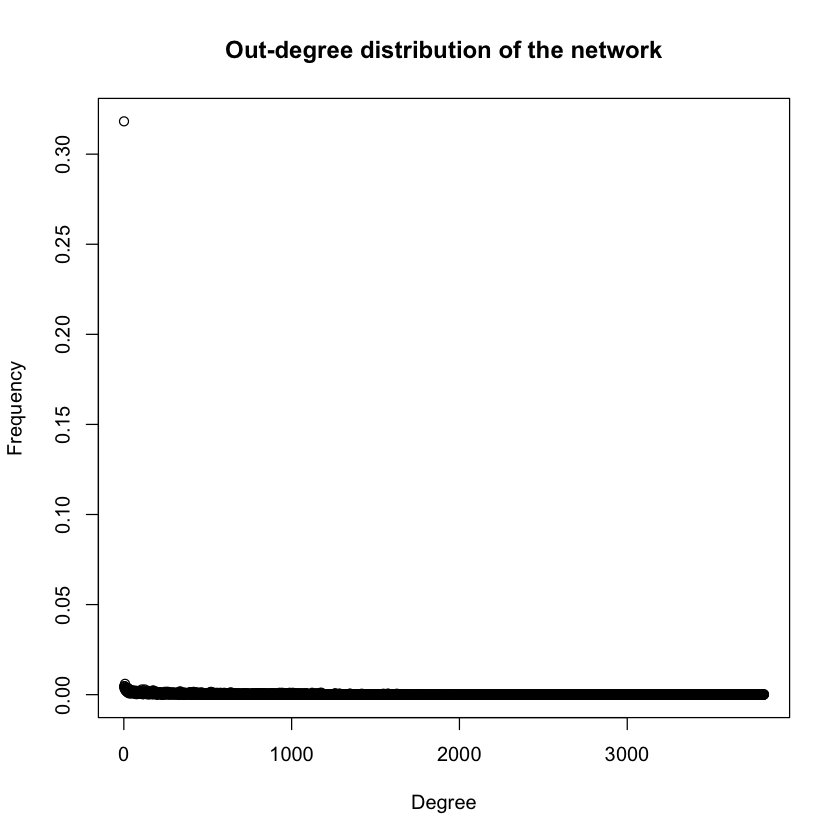

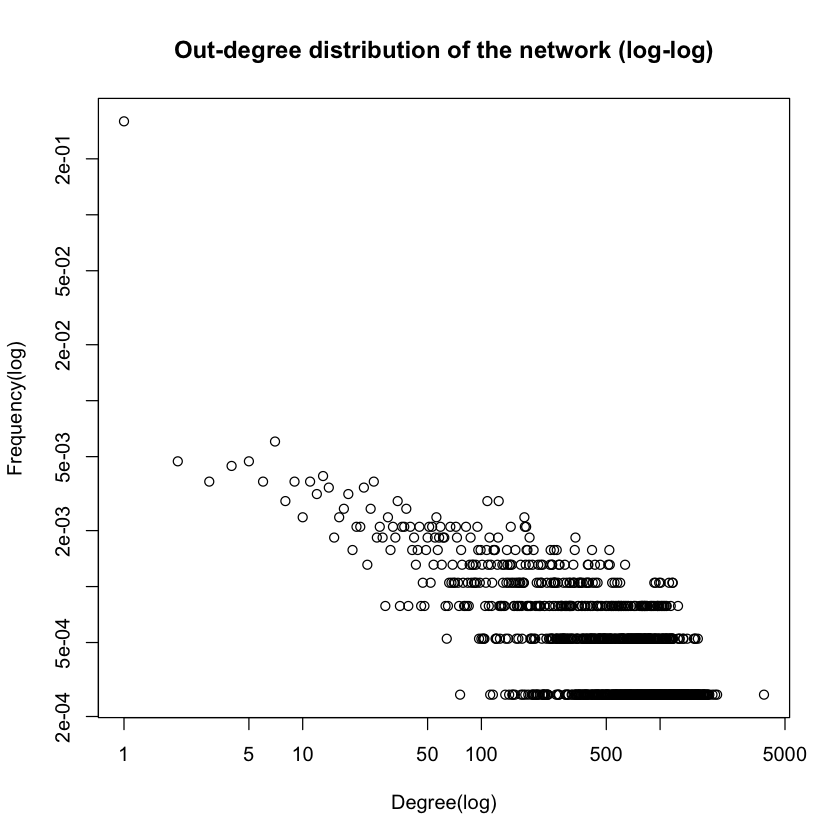

Walk-trap modularity : 0.1910903 


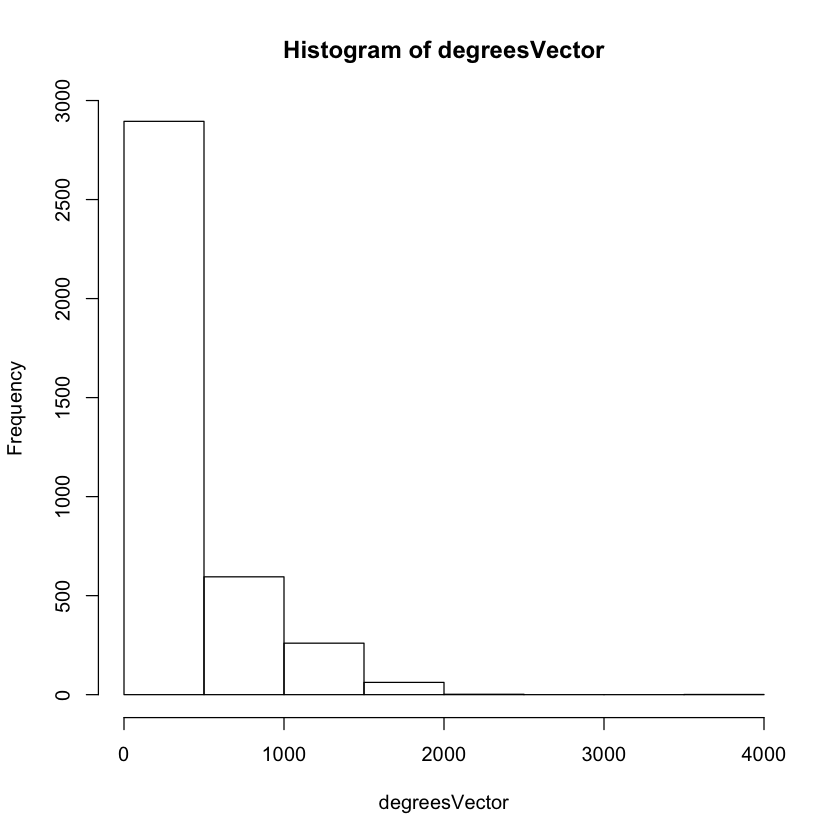

[1] 31
[1] "======================================================================================="
[1] "Personal Network : # 109327480479767108490"
[1] "======================================================================================="
[1] "Number of circles:  3"


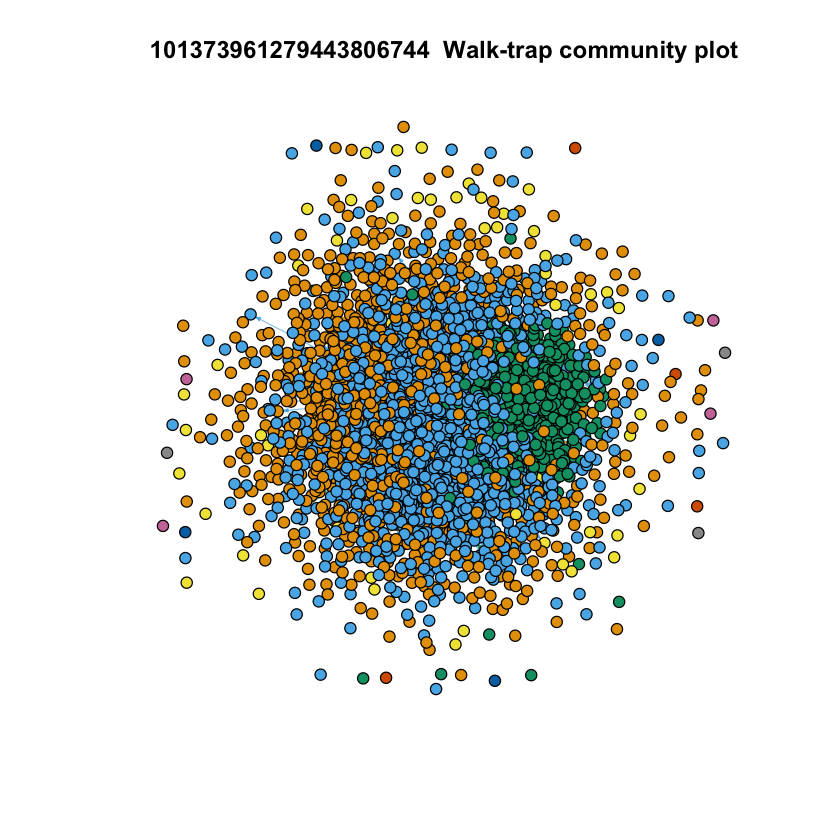

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“39 y values <= 0 omitted from logarithmic plot”

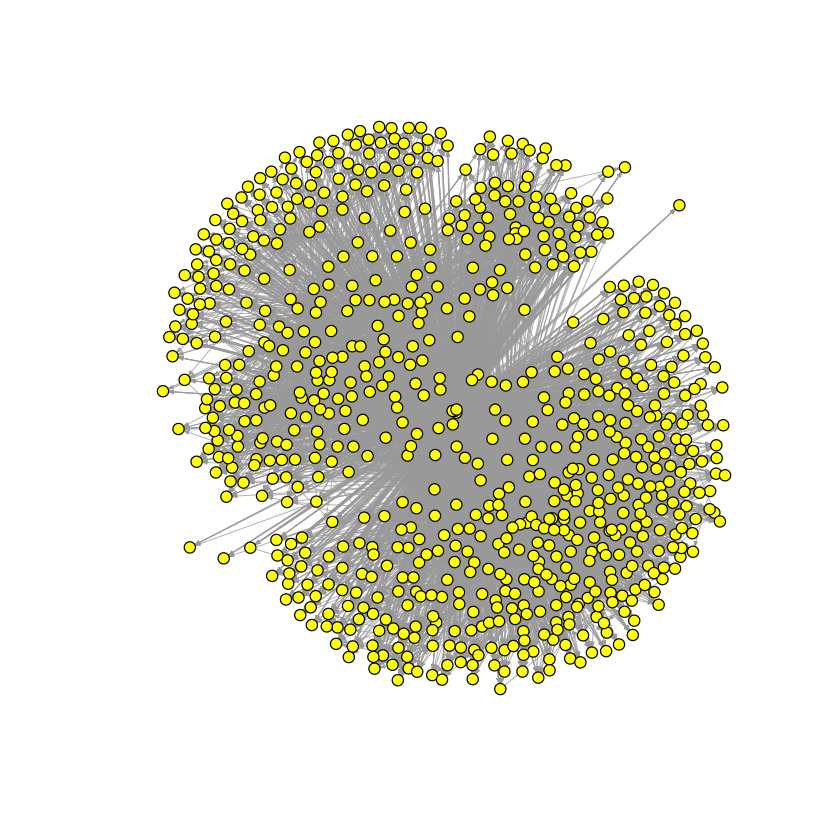

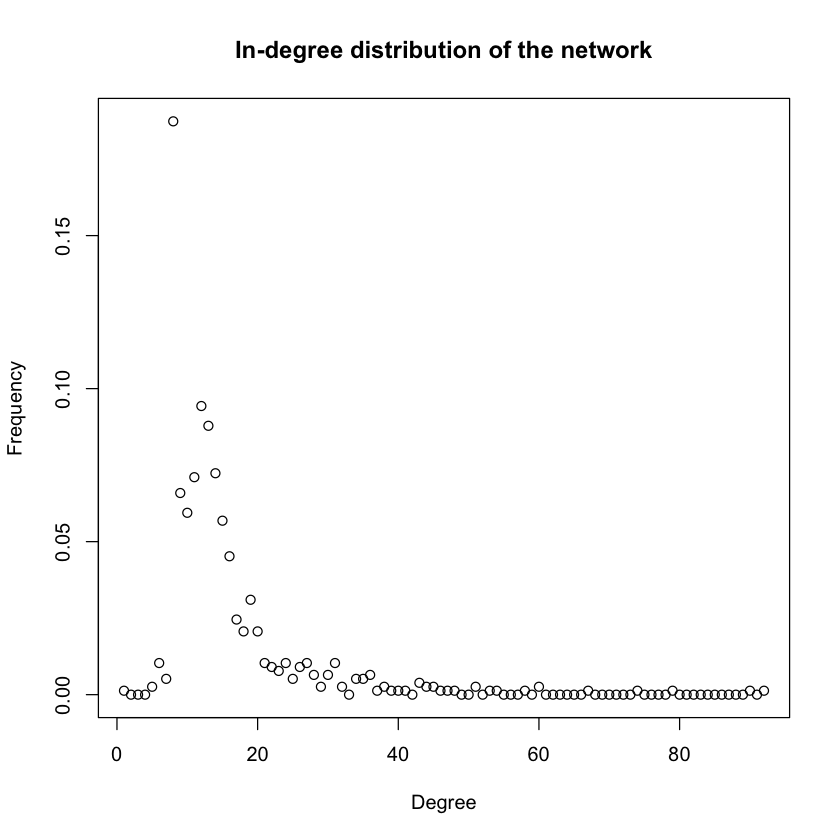

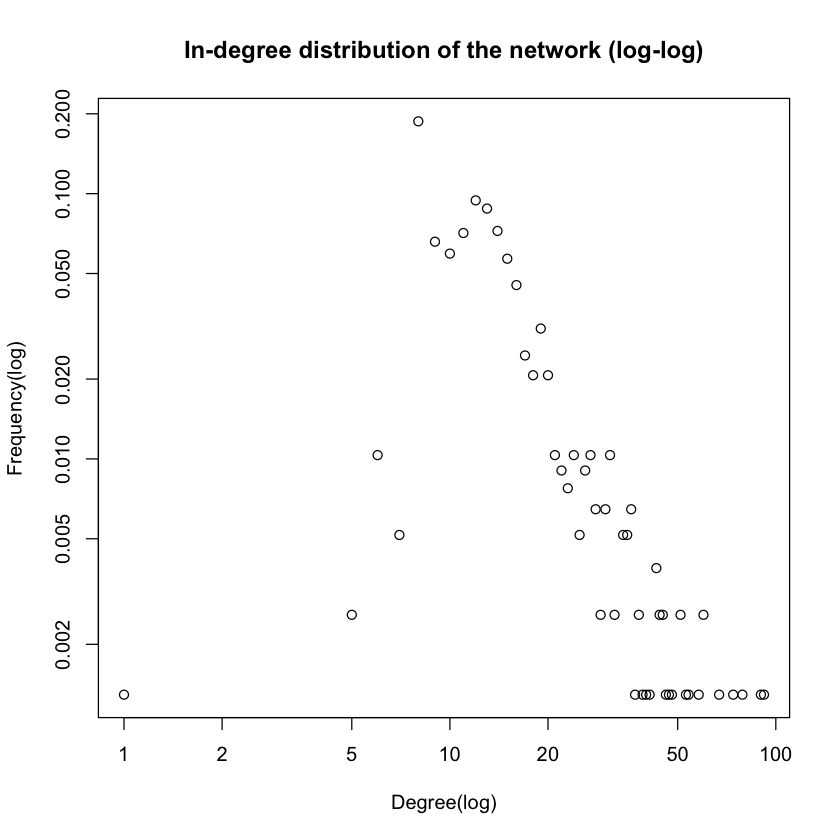

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“703 y values <= 0 omitted from logarithmic plot”

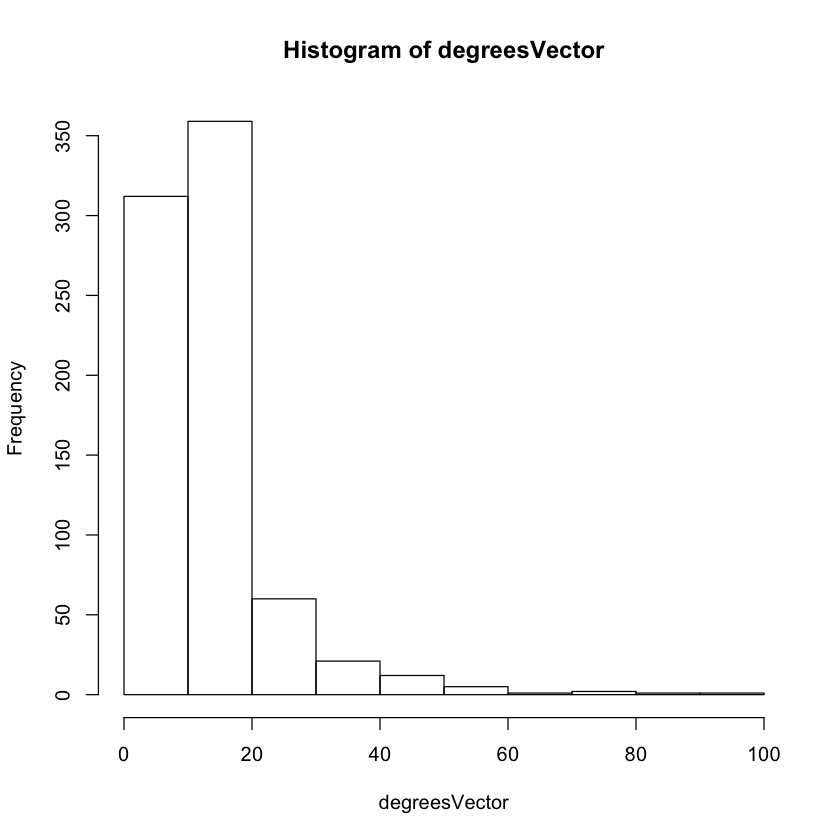

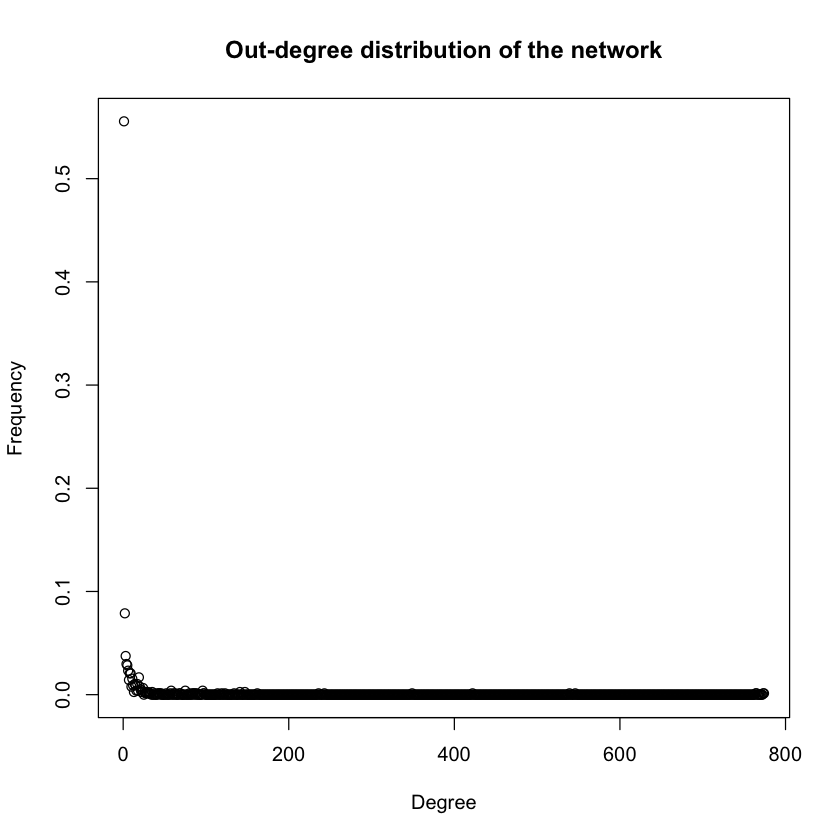

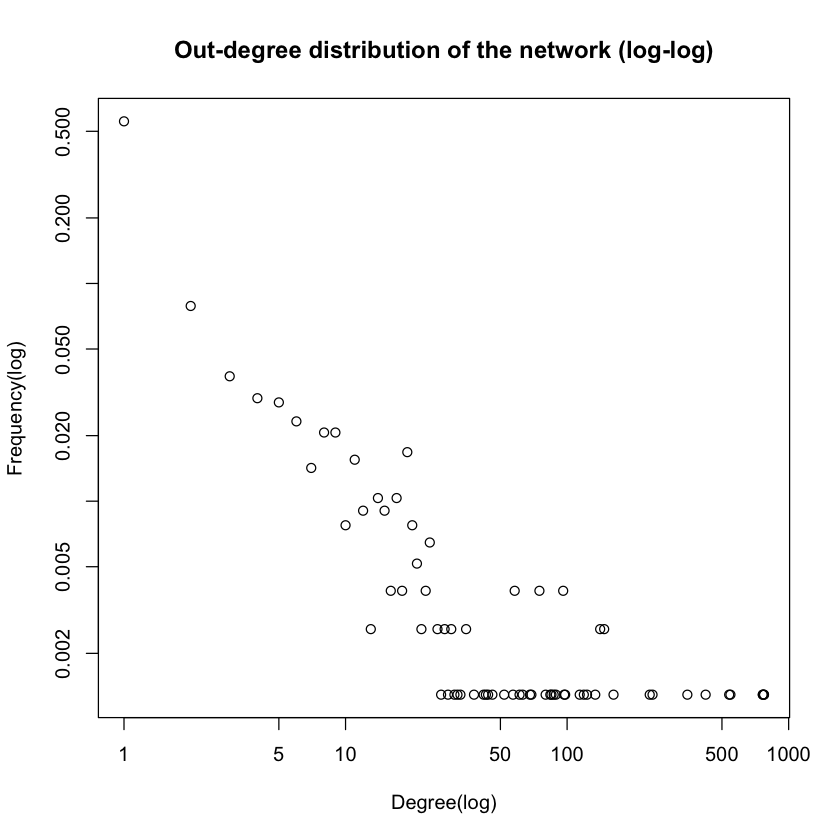

Walk-trap modularity : 0.2527654 


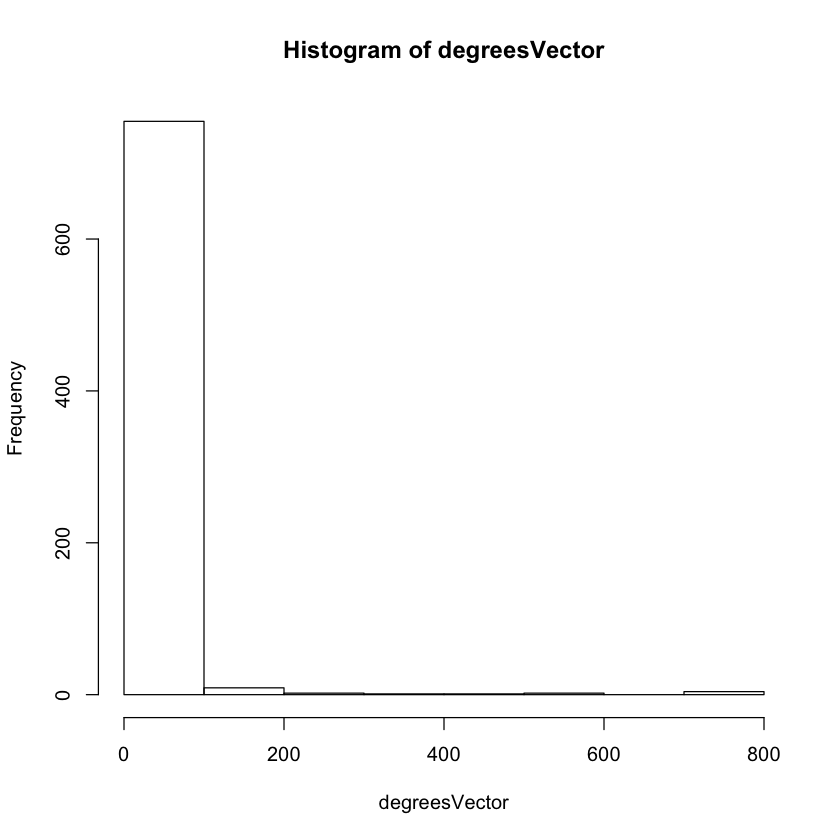

[1] 4
[1] "======================================================================================="
[1] "Personal Network : # 115625564993990145546"
[1] "======================================================================================="
[1] "Number of circles:  31"


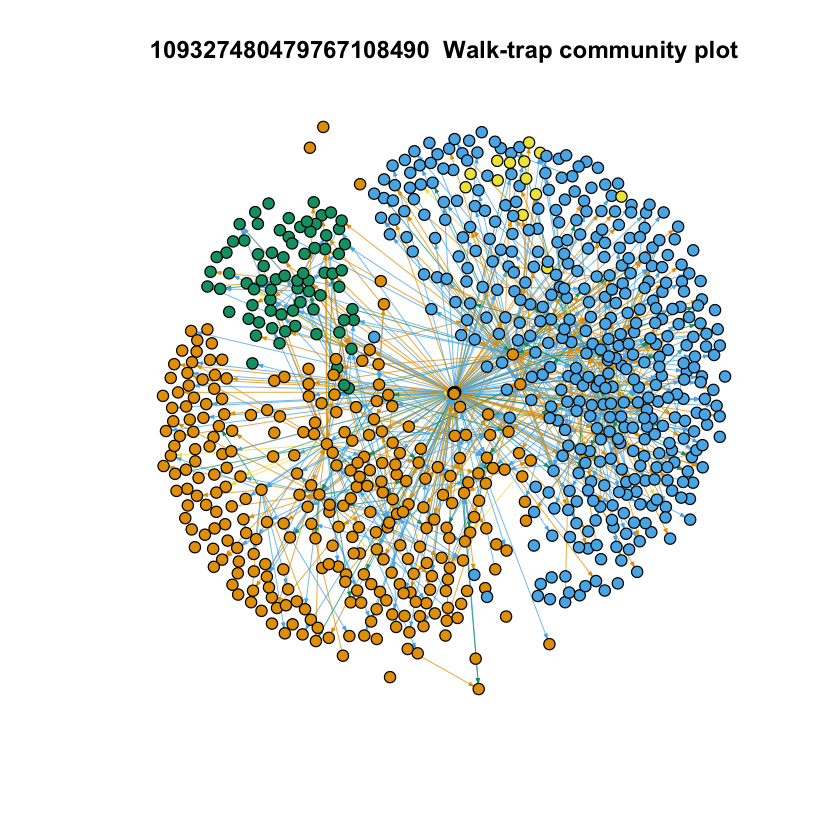

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“107 y values <= 0 omitted from logarithmic plot”

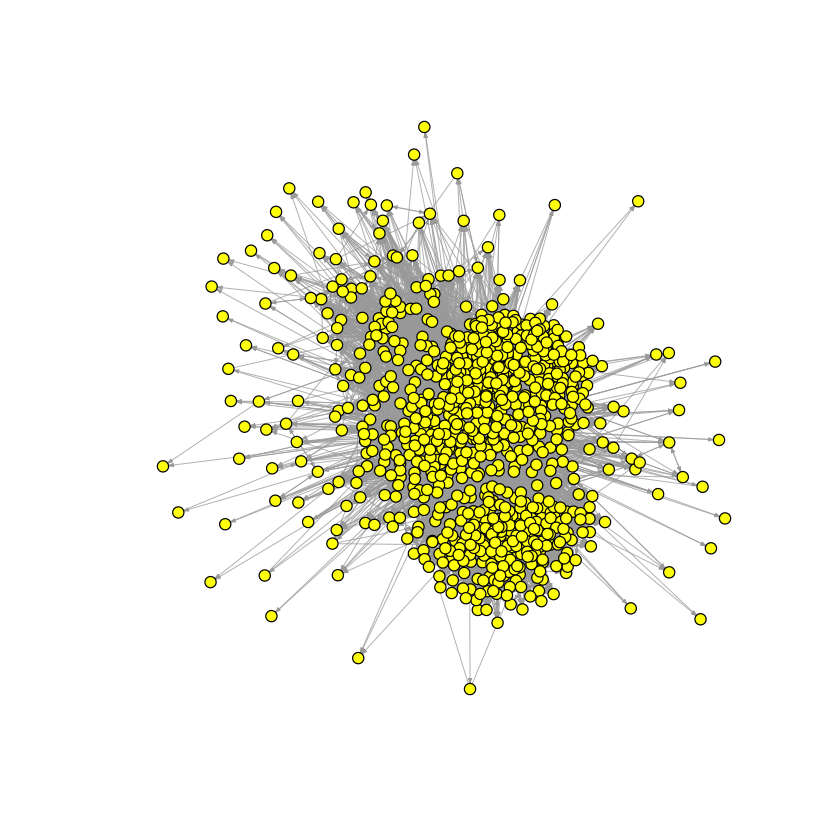

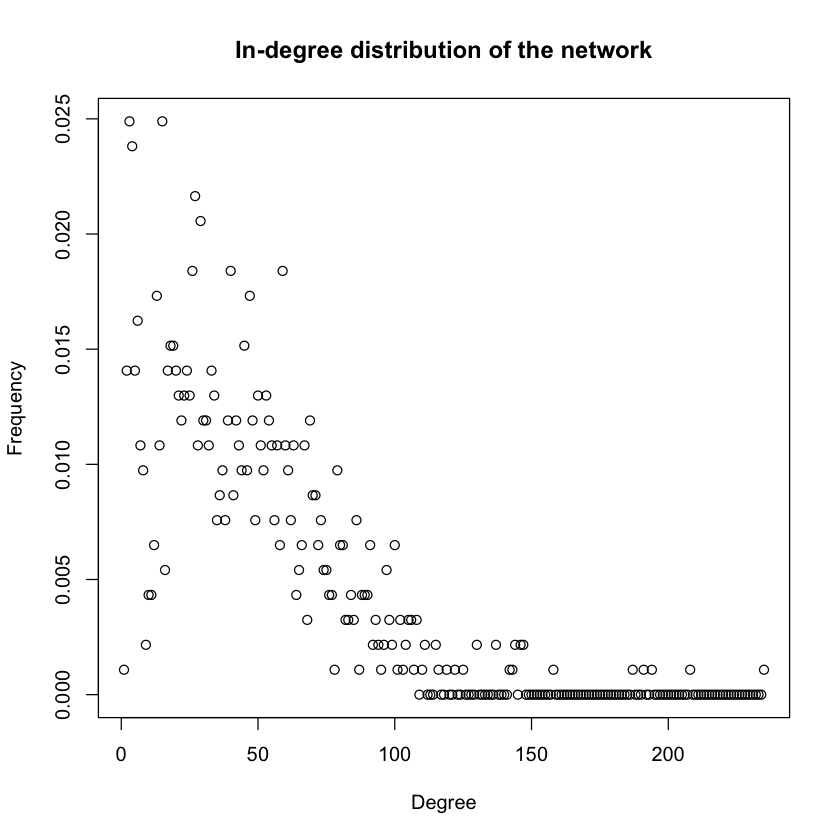

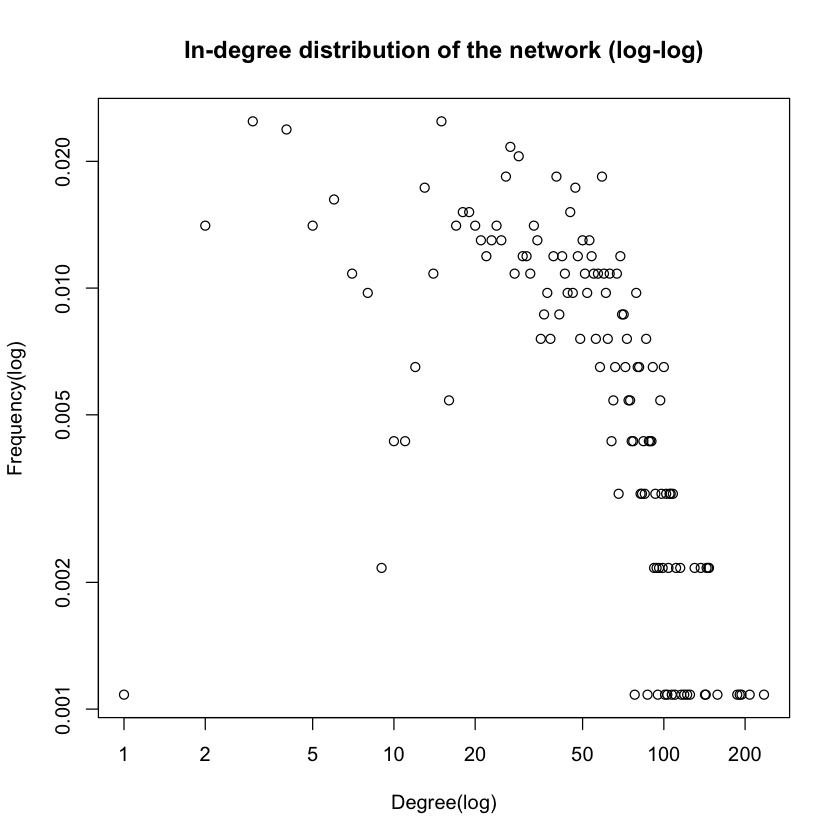

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“750 y values <= 0 omitted from logarithmic plot”

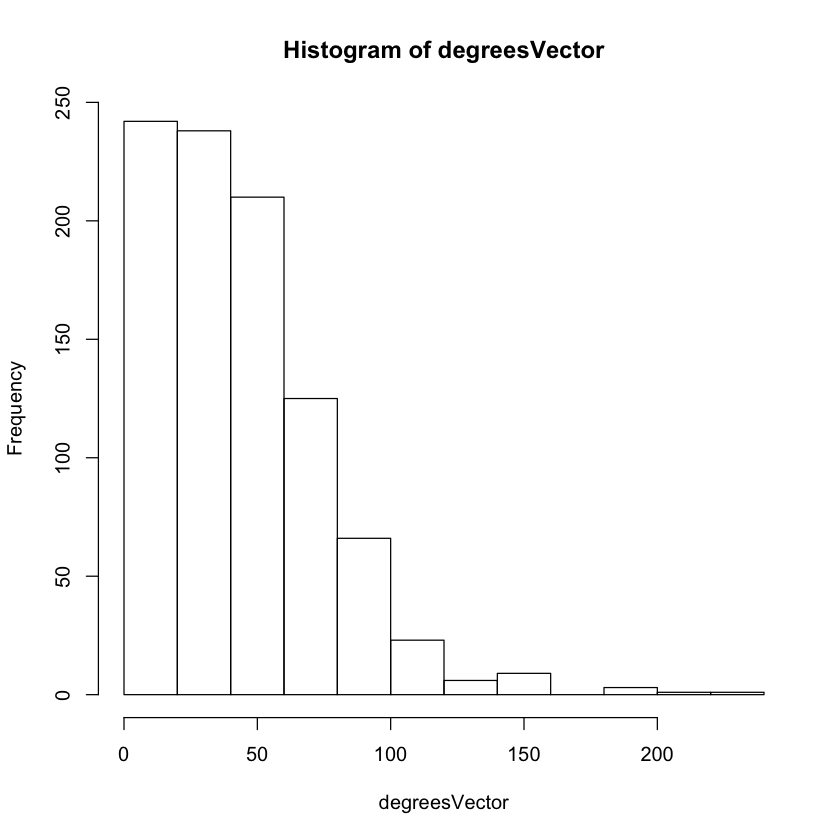

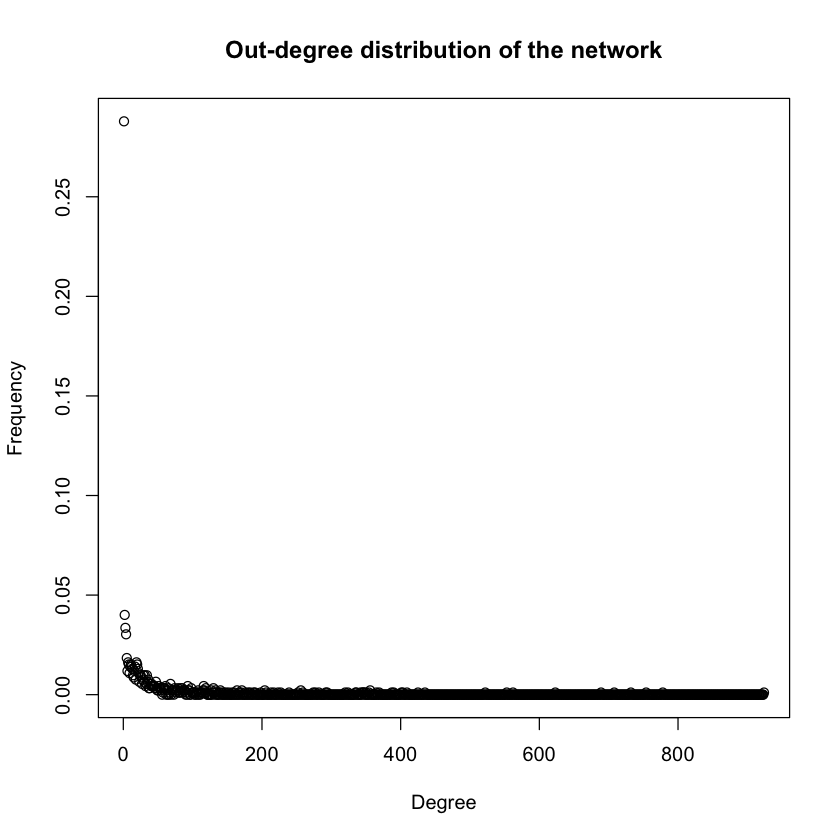

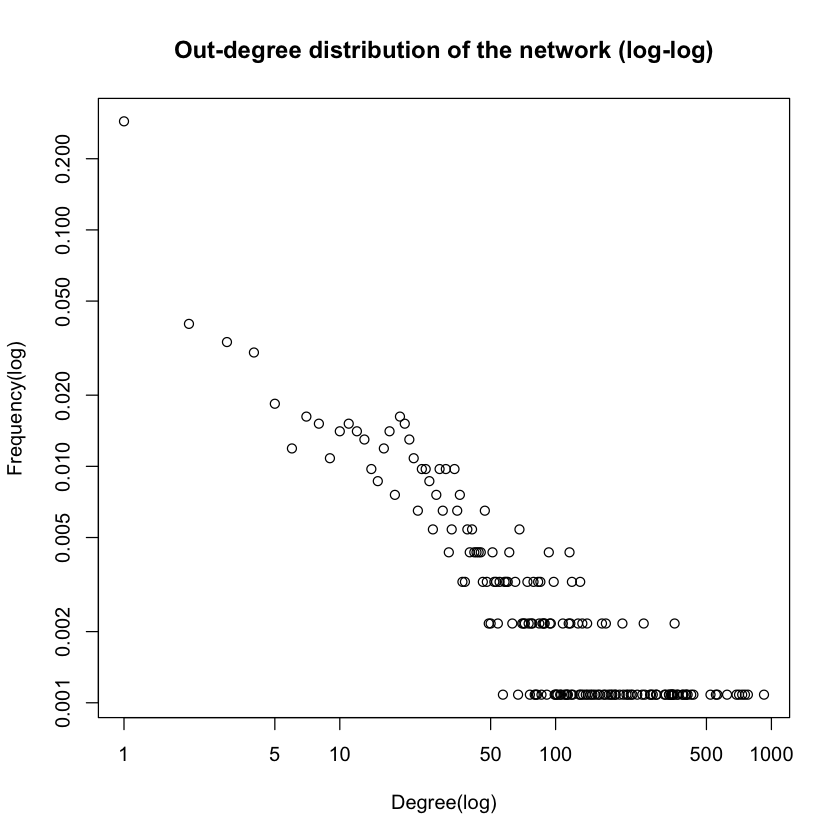

Walk-trap modularity : 0.3194726 


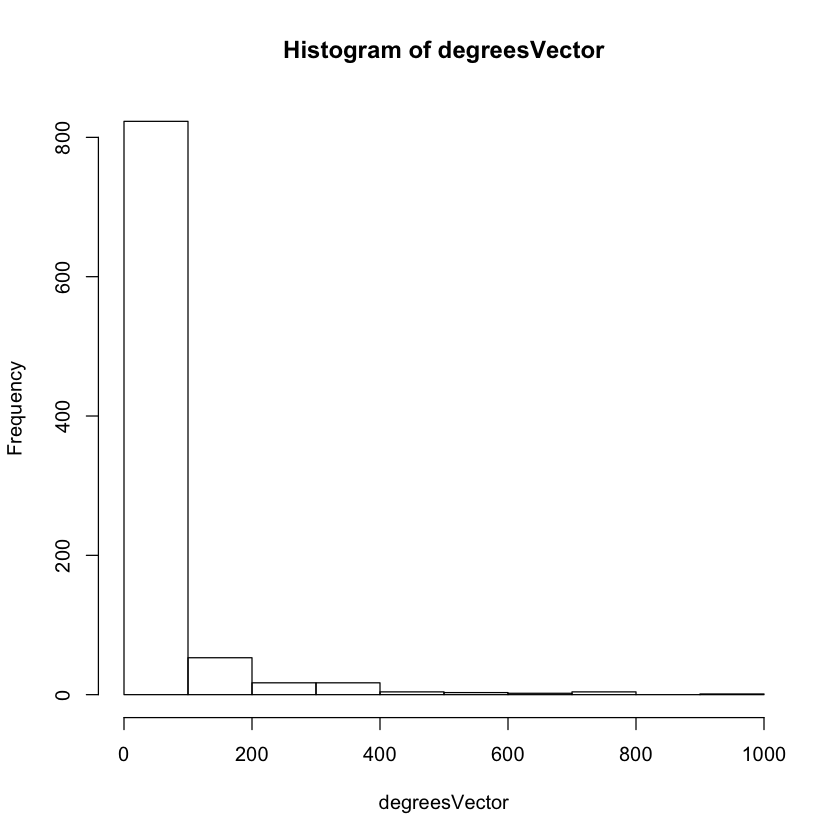

[1] 10


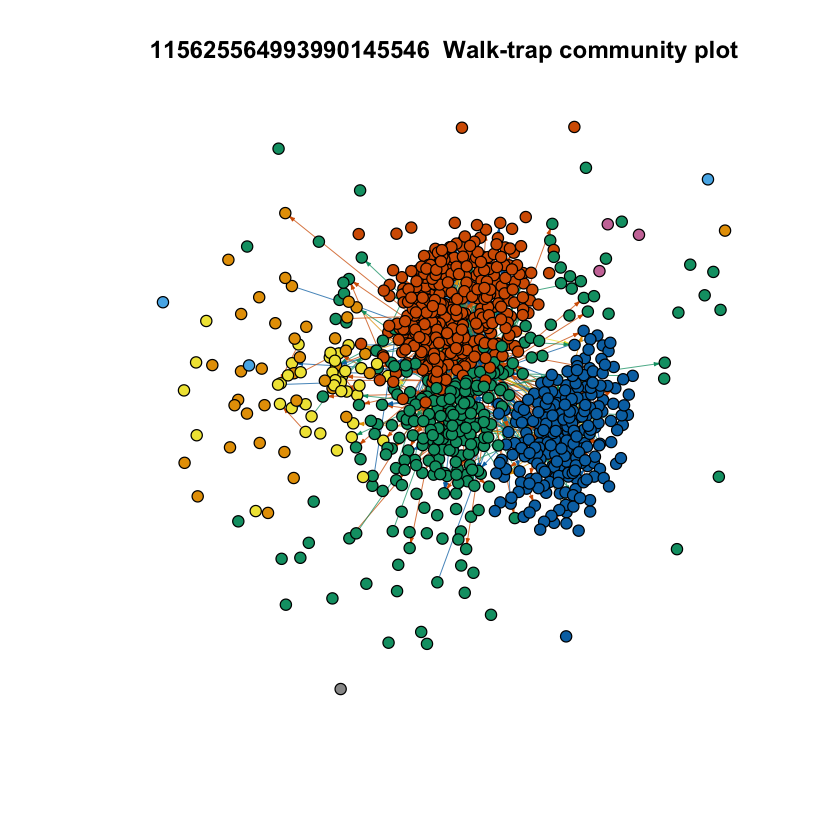

In [45]:
userNodes <- dir("gplus", pattern="circles")

files <- list()

print('Number of personal networks: ')
print(length(userNodes))

# for(i in 1: length(userNodes)){
#         files[[i]] <- strsplit(userNodes[i], ".circles")
# }

# pn_list = c('109327480479767108490', '115625564993990145546', '101373961279443806744')

# for(i in pn_list):


for(i in 1: length(userNodes)){
    files[[i]] <- strsplit(userNodes[i], ".circles")
    
    if(files[[i]] == "109327480479767108490" | files[[i]] == "115625564993990145546" | files[[i]] == "101373961279443806744"){


    circleFiles <- paste('gplus/', files[[i]], ".circles", sep="")
    fileConn <- file(circleFiles, open="r")
    circles <- readLines(fileConn)
    close(fileConn)
    
    if(length(circles) > 2){


        allCircles <- list()
        for(c in 1:length(circles)){
            content <- strsplit(circles[c], "\t")
            allCircles <- c(allCircles, list(content[[1]][-1]))
        }
        
        
        edgeFiles <- paste('gplus/', files[[i]], ".edges", sep="")
        googleNetwork <- read.graph(edgeFiles, format="ncol", directed=TRUE)
        googleNetwork <- add.vertices(googleNetwork, nv=1, name = files[[i]])
        
        edgeList <- c()
        for(node in 1:(vcount(googleNetwork)-1)){
            edgeList <- c(edgeList, c(vcount(googleNetwork), node))
        }
        
        googleNetwork <- add_edges(googleNetwork, edgeList)
            print('=======================================================================================')
            print(paste("Personal Network : #", files[[i]]))
            print('=======================================================================================')

            print(paste("Number of circles: ", length(allCircles))) 
        
            plot(googleNetwork, vertex.size=4, vertex.label.cex=0.01,vertex.color="yellow", edge.arrow.size=0.2, edge.width=0.6)
        
        
            plot(degree.distribution(googleNetwork, mode="in"), main="In-degree distribution of the network",xlab="Degree",ylab="Frequency")
            plot(degree.distribution(googleNetwork, mode="in"), main="In-degree distribution of the network (log-log)",xlab="Degree(log)",ylab="Frequency(log)", log="xy")
            degreesVector <- degree(googleNetwork, mode="in")
            hist(degreesVector)
        
            plot(degree.distribution(googleNetwork, mode="out")  , main="Out-degree distribution of the network",xlab="Degree",ylab="Frequency")
            plot(degree.distribution(googleNetwork, mode="out"), main="Out-degree distribution of the network (log-log)",xlab="Degree(log)",ylab="Frequency(log)", log="xy")
            degreesVector <- degree(googleNetwork, mode="out")
            hist(degreesVector)
        
        walktrap_community <- walktrap.community(googleNetwork)
        cat(paste("Walk-trap modularity :"),modularity(walktrap_community),"\n")
        plot(googleNetwork,vertex.size=4,vertex.color=membership(walktrap_community),vertex.label.cex=0.01, edge.arrow.size=0.2, edge.width=0.6, edge.color = membership(walktrap_community))
        title(main = paste(files[[i]]," Walk-trap community plot"))
        print(length(walktrap_community))

        
        }
    }    
}
